<a href="https://colab.research.google.com/github/dunguyen0102/ml_k46/blob/main/IRIS_GMM_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import các thư viện

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Load dataset 
Dataset IRIS gồm 150 mẫu dữ liệu, 5 thuộc tính:

    

1.   sepal length in cm
2.   sepal width in cm
3.   petal length in cm
4.   petal width in cm
5.   **class**: (3 loại hoa) Iris Setosa, Iris Versicolour, Iris Virginica

    
    
    


In [66]:
# Load iris dataset
iris = load_iris()


# Tiền xử lý dữ liệu

1.   Dữ liệu được scale bằng StandardScaler, sau đó normalize lại
2.   PCA được sử dụng để lấy ra 2 thành phần chính, PC1 và PC2 phục vụ cho clustering

In [67]:
# 
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

In [68]:
# Sử dụng PCA để lấy ra 2 thành phần chính
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X)

# Dữ liệu sau khi lấy 2 thành phần chính bằng PCA

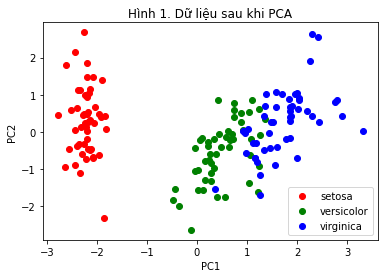

In [69]:
# Plot dữ liệu sau khi xử lý
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X_principal[iris.target == i, 0], X_principal[iris.target == i, 1], c=colors[i], label=iris.target_names[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Hình 1. Dữ liệu sau khi PCA')
plt.show()

# Áp dụng kmeans để chia dataset thành 3 cụm



In [70]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

# Predict the clusters
y_pred_kmeans = kmeans.predict(X_principal)


# Kết quả sau khi gom cụm bằng KMeans


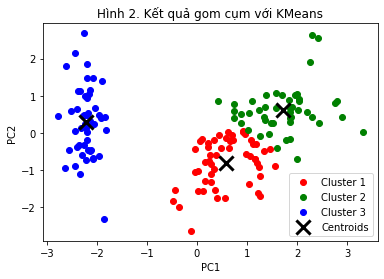

In [71]:
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X_principal[y_pred_kmeans == i, 0], X_principal[y_pred_kmeans == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='k', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Hình 2. Kết quả gom cụm với KMeans')
plt.show()

# Áp dụng GMM để chia dataset thành 3 cụm


In [72]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_principal)

# Predict the clusters
y_pred_gmm = gmm.predict(X_principal)

# Kết quả sau khi gom cụm bằng GMM

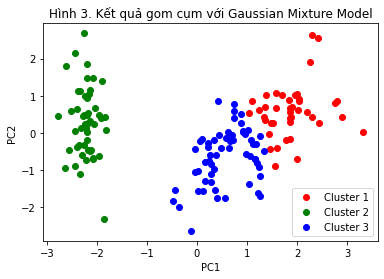

In [73]:
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X_principal[y_pred_gmm == i, 0], X_principal[y_pred_gmm == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Hình 3. Kết quả gom cụm với Gaussian Mixture Model')
plt.show()

Từ kết quả gom cụm bằng phương pháp KMeans và GMM ở 2 hình trên, có thể thấy phương pháp GMM cho ra kết quả gom cụm tốt hơn.
Để rõ hơn về điều này, nhóm sử dụng Adjusted Rand Score để so sánh kết quả giữa 2 phương pháp này.

# Tính adjusted_rand_score

In [74]:
ri_kmeans = adjusted_rand_score(iris.target, y_pred_kmeans)

print(f"Adjusted Rand score với KMeans: {ri_kmeans:.3f}")

ri_gmm = adjusted_rand_score(iris.target, y_pred_gmm)

print(f"Adjusted Rand score với GMM: {ri_gmm:.3f}")

Adjusted Rand score với KMeans: 0.620
Adjusted Rand score với GMM: 0.716


Dựa vào Adjusted Rand Score, phương pháp GMM có kết quả gom cụm tốt hơn KMeans. Mặc dù, đây chưa phải là kết quả tốt nhất nếu so với dữ liệu sau khi dùng PCA (Hình 1). 